## Creating and Backtesting SMA Strategy

In [103]:
# Getting the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8')

In [104]:
df = pd.read_csv("eurusd.csv", parse_dates=['Date'], index_col='Date')

In [105]:
df

,price
Date,
2004-01-01,1.258194
2004-01-02,1.258194
2004-01-05,1.268698
2004-01-06,1.272103
2004-01-07,1.264095
...,...
2020-06-24,1.131235
2020-06-25,1.125087
2020-06-26,1.122208


In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4275 entries, 2004-01-01 to 2020-06-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   4275 non-null   float64
dtypes: float64(1)
memory usage: 66.8 KB


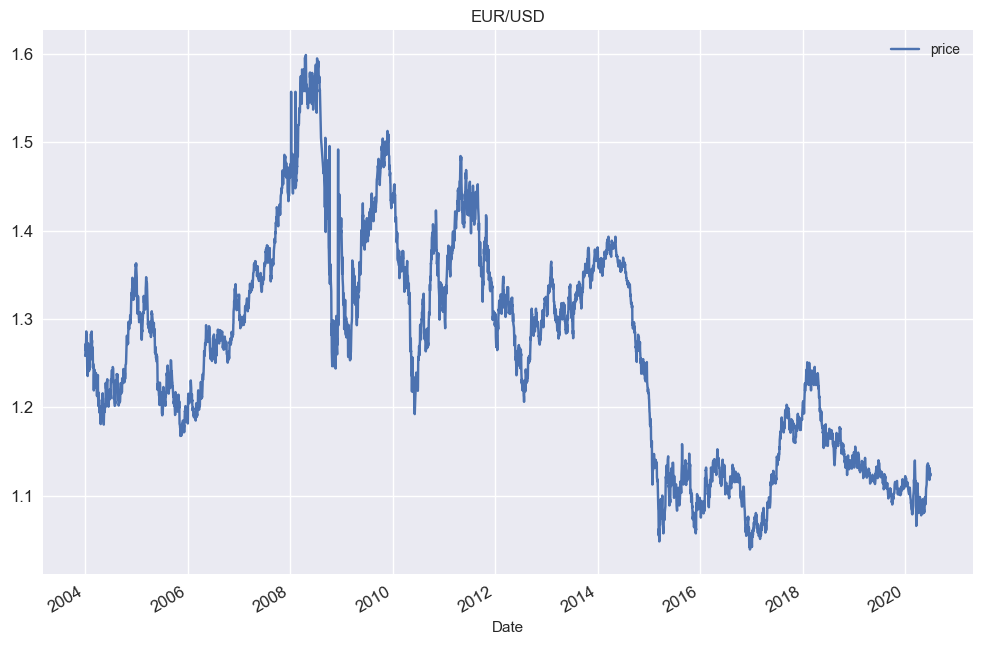

In [107]:
df.plot(figsize=(12, 8), title='EUR/USD', fontsize=12)
plt.show()

In [108]:
df['returns'] = np.log(df.div(df.shift(1)))

In [109]:
df

,price,returns
Date,,
2004-01-01,1.258194,NaN
2004-01-02,1.258194,0.000000
2004-01-05,1.268698,0.008313
2004-01-06,1.272103,0.002681
2004-01-07,1.264095,-0.006315
...,...,...
2020-06-24,1.131235,0.002892
2020-06-25,1.125087,-0.005449
2020-06-26,1.122208,-0.002562


## A Simple Buy & Hold "Strategy"

In [110]:
df.dropna(inplace=True)

In [111]:
df

,price,returns
Date,,
2004-01-02,1.258194,0.000000
2004-01-05,1.268698,0.008313
2004-01-06,1.272103,0.002681
2004-01-07,1.264095,-0.006315
2004-01-08,1.277498,0.010547
...,...,...
2020-06-24,1.131235,0.002892
2020-06-25,1.125087,-0.005449
2020-06-26,1.122208,-0.002562


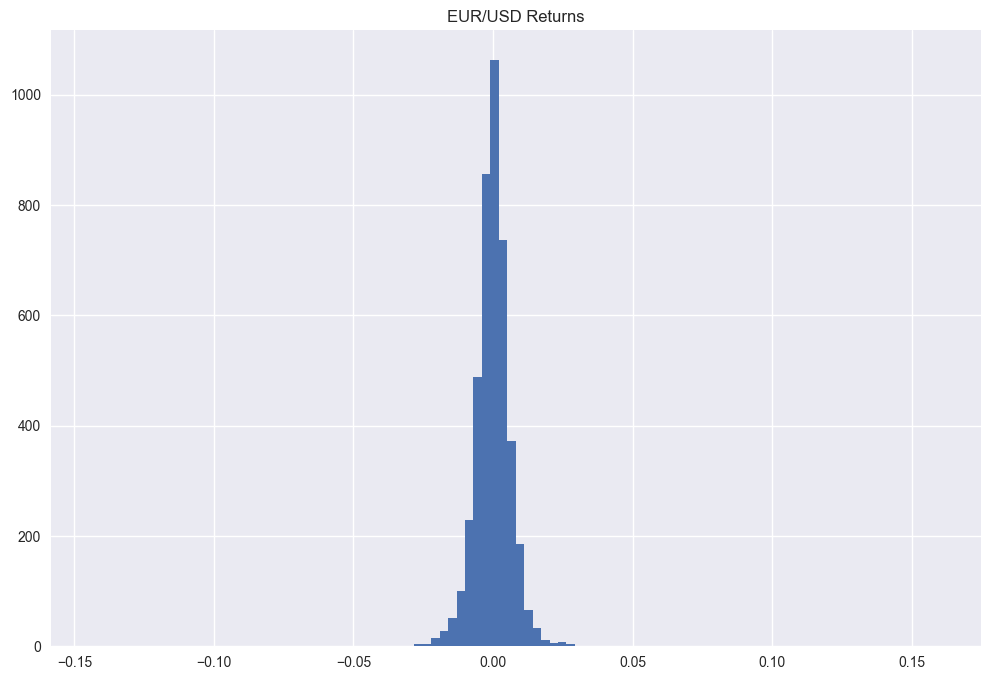

In [112]:
df.returns.hist(bins=100, figsize=(12, 8))
plt.title("EUR/USD Returns")
plt.show()

In [113]:
df.returns.sum() # this is the sum of all the cumulative log returns
# in total we lost about -11% of our money

-0.11214302770699758

In [114]:
np.exp(df.returns.sum())
# so we invested 1 dollar and after 16 years we have 0.89 cents left

0.8939163935445148

In [115]:
df.price[-1] / df.price[0]

/var/folders/1j/5hj24bld2mgc750tl1zp_jgh0000gn/T/ipykernel_78992/1327233477.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df.price[-1] / df.price[0]


0.8939163935445141

In [116]:
df.returns.cumsum().apply(np.exp)

Date
2004-01-02    1.000000
2004-01-05    1.008348
2004-01-06    1.011055
2004-01-07    1.004690
2004-01-08    1.015343
                ...   
2020-06-24    0.899094
2020-06-25    0.894208
2020-06-26    0.891920
2020-06-29    0.892221
2020-06-30    0.893916
Name: returns, Length: 4274, dtype: float64

In [117]:
df["creturns"] = df.returns.cumsum().apply(np.exp)
# this is the cumulative sum from the beginning of the time series to the end

In [118]:
df

,price,returns,creturns
Date,,,
2004-01-02,1.258194,0.000000,1.000000
2004-01-05,1.268698,0.008313,1.008348
2004-01-06,1.272103,0.002681,1.011055
2004-01-07,1.264095,-0.006315,1.004690
2004-01-08,1.277498,0.010547,1.015343
...,...,...,...
2020-06-24,1.131235,0.002892,0.899094
2020-06-25,1.125087,-0.005449,0.894208
2020-06-26,1.122208,-0.002562,0.891920


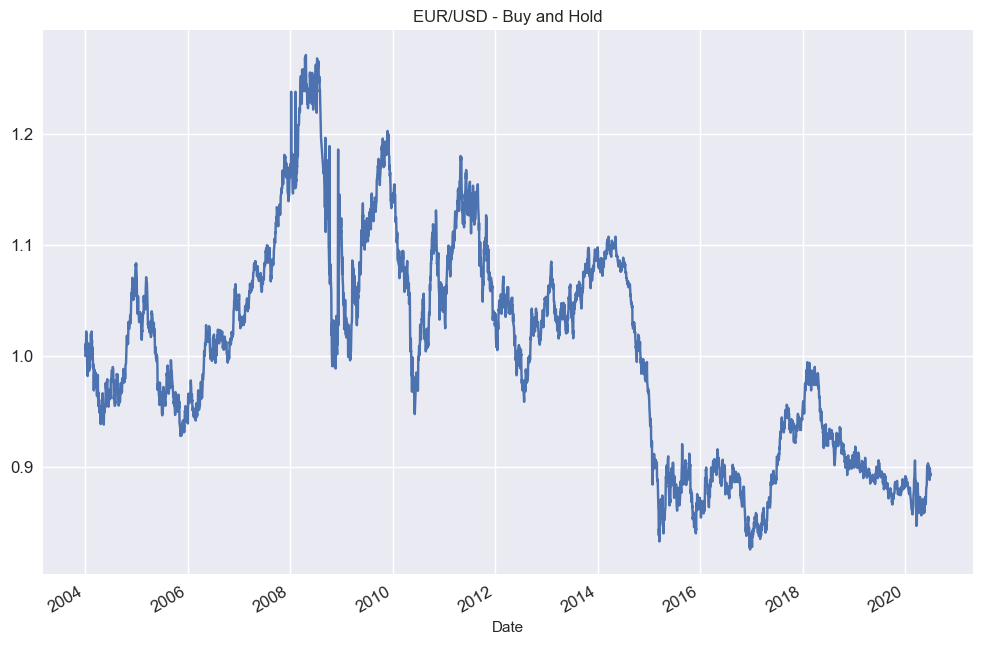

In [119]:
# here we plot the cumulative returns and normalize it by starting at 1
df.creturns.plot(figsize=(12, 8), title="EUR/USD - Buy and Hold" , fontsize=12)
plt.show()
# this is how we will compare and analyze our strategies


### More Performance Metrics

In [120]:
df

,price,returns,creturns
Date,,,
2004-01-02,1.258194,0.000000,1.000000
2004-01-05,1.268698,0.008313,1.008348
2004-01-06,1.272103,0.002681,1.011055
2004-01-07,1.264095,-0.006315,1.004690
2004-01-08,1.277498,0.010547,1.015343
...,...,...,...
2020-06-24,1.131235,0.002892,0.899094
2020-06-25,1.125087,-0.005449,0.894208
2020-06-26,1.122208,-0.002562,0.891920


In [121]:
df.creturns.iloc[-1] # absolute performance

0.8939163935445149

In [122]:
df.returns.sum() # absolute performance

-0.11214302770699758

In [123]:
df.describe()

,price,returns,creturns
count,4274.000000,4274.000000,4274.000000
mean,1.262336,-0.000026,1.003292
std,0.122233,0.007593,0.097150
min,1.039047,-0.143324,0.825824
25%,1.145548,-0.003370,0.910470
50%,1.269205,0.000000,1.008751
75%,1.348909,0.003361,1.072099
max,1.598798,0.159632,1.270709


#### annualized mean return and risk

In [124]:
df.returns.mean() * 252 # mean return

-0.006612083056191715

In [125]:
df.returns.std() * np.sqrt(252) # standard deviation or risk

0.12054120479431406

#### maximum drawdown

In [126]:
df

,price,returns,creturns
Date,,,
2004-01-02,1.258194,0.000000,1.000000
2004-01-05,1.268698,0.008313,1.008348
2004-01-06,1.272103,0.002681,1.011055
2004-01-07,1.264095,-0.006315,1.004690
2004-01-08,1.277498,0.010547,1.015343
...,...,...,...
2020-06-24,1.131235,0.002892,0.899094
2020-06-25,1.125087,-0.005449,0.894208
2020-06-26,1.122208,-0.002562,0.891920


In [127]:
df["cummax"] = df.creturns.cummax()

In [128]:
df

,price,returns,creturns,cummax
Date,,,,
2004-01-02,1.258194,0.000000,1.000000,1.000000
2004-01-05,1.268698,0.008313,1.008348,1.008348
2004-01-06,1.272103,0.002681,1.011055,1.011055
2004-01-07,1.264095,-0.006315,1.004690,1.011055
2004-01-08,1.277498,0.010547,1.015343,1.015343
...,...,...,...,...
2020-06-24,1.131235,0.002892,0.899094,1.270709
2020-06-25,1.125087,-0.005449,0.894208,1.270709
2020-06-26,1.122208,-0.002562,0.891920,1.270709


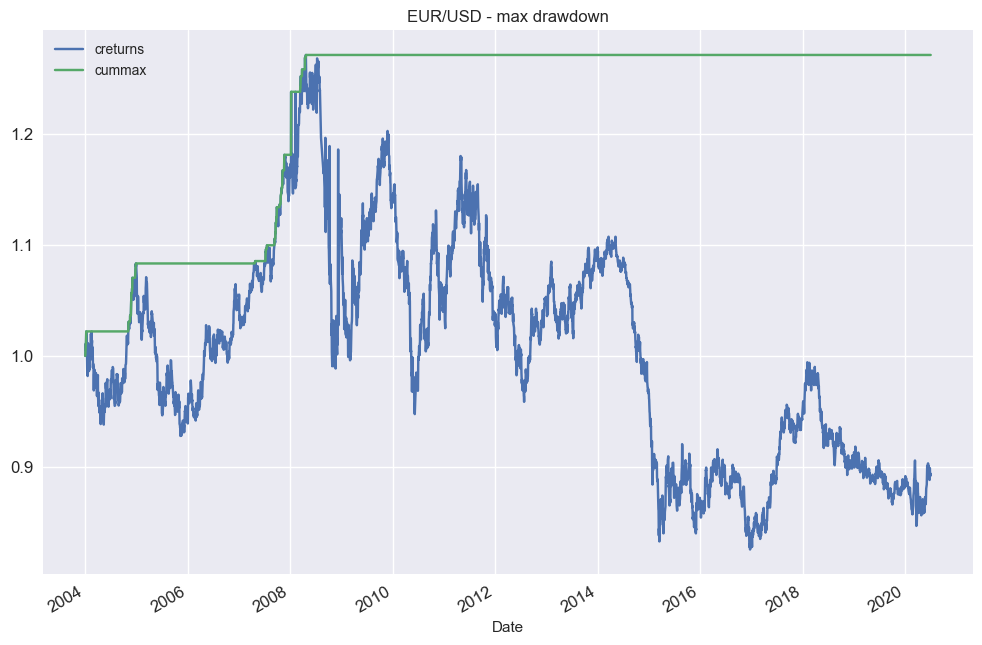

In [129]:
# 
df[["creturns", "cummax"]].dropna().plot(figsize=(12, 8), title="EUR/USD - max drawdown", fontsize=12)
plt.show()

In [130]:
drawdown = df["cummax"] - df["creturns"]
drawdown

Date
2004-01-02    0.000000
2004-01-05    0.000000
2004-01-06    0.000000
2004-01-07    0.006365
2004-01-08    0.000000
                ...   
2020-06-24    0.371615
2020-06-25    0.376500
2020-06-26    0.378788
2020-06-29    0.378488
2020-06-30    0.376792
Length: 4274, dtype: float64

In [131]:
drawdown.max()

0.4448840569933439

In [132]:
drawdown.idxmax()

Timestamp('2016-12-21 00:00:00')

### Defining a SMS Cross-Over Strategy

In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8')

In [134]:
data = pd.read_csv("eurusd.csv", parse_dates=['Date'], index_col='Date')

In [135]:
data

,price
Date,
2004-01-01,1.258194
2004-01-02,1.258194
2004-01-05,1.268698
2004-01-06,1.272103
2004-01-07,1.264095
...,...
2020-06-24,1.131235
2020-06-25,1.125087
2020-06-26,1.122208


In [136]:
sma_s = 50
sma_l = 200

In [137]:
data.price.rolling(50).mean()

Date
2004-01-01         NaN
2004-01-02         NaN
2004-01-05         NaN
2004-01-06         NaN
2004-01-07         NaN
                ...   
2020-06-24    1.101794
2020-06-25    1.102486
2020-06-26    1.103213
2020-06-29    1.103931
2020-06-30    1.104695
Name: price, Length: 4275, dtype: float64

In [138]:
data["SMA_S"] = data.price.rolling(sma_s).mean()

In [139]:
data["SMA_L"] = data.price.rolling(sma_l).mean()

In [140]:
data

,price,SMA_S,SMA_L
Date,,,
2004-01-01,1.258194,NaN,NaN
2004-01-02,1.258194,NaN,NaN
2004-01-05,1.268698,NaN,NaN
2004-01-06,1.272103,NaN,NaN
2004-01-07,1.264095,NaN,NaN
...,...,...,...
2020-06-24,1.131235,1.101794,1.103430
2020-06-25,1.125087,1.102486,1.103540
2020-06-26,1.122208,1.103213,1.103627


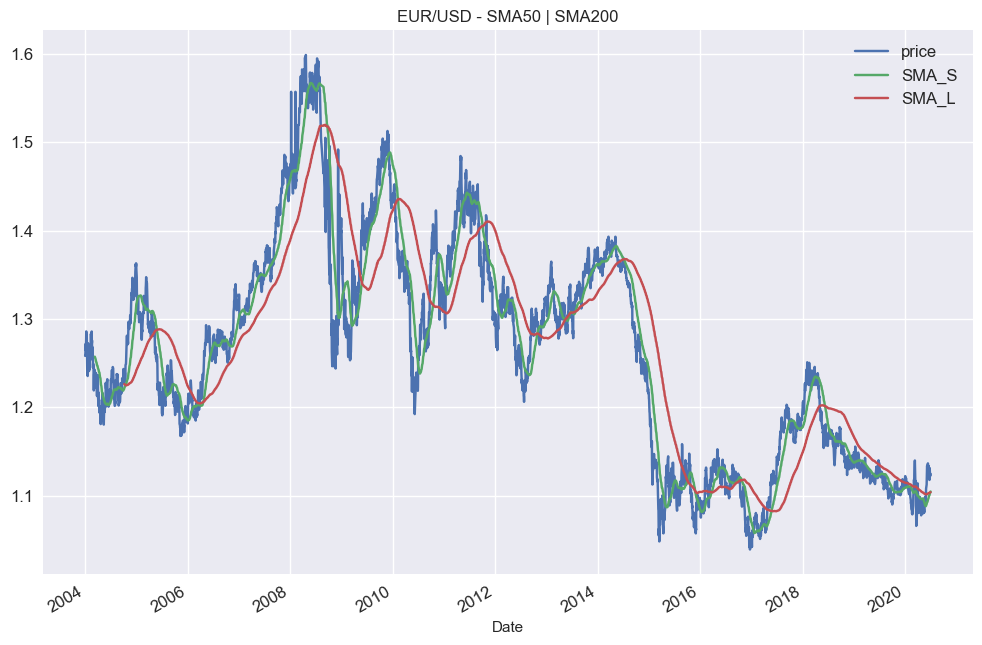

In [141]:
data.plot(figsize=(12, 8), title="EUR/USD - SMA{} | SMA{}".format(sma_s, sma_l), fontsize=12)
plt.legend(fontsize=12)
plt.show()

In [142]:
data.dropna(inplace=True)

In [143]:
data

,price,SMA_S,SMA_L
Date,,,
2004-10-06,1.228094,1.221318,1.226222
2004-10-07,1.229906,1.221840,1.226081
2004-10-08,1.241003,1.222628,1.225995
2004-10-11,1.238405,1.223352,1.225843
2004-10-12,1.232104,1.223888,1.225643
...,...,...,...
2020-06-24,1.131235,1.101794,1.103430
2020-06-25,1.125087,1.102486,1.103540
2020-06-26,1.122208,1.103213,1.103627


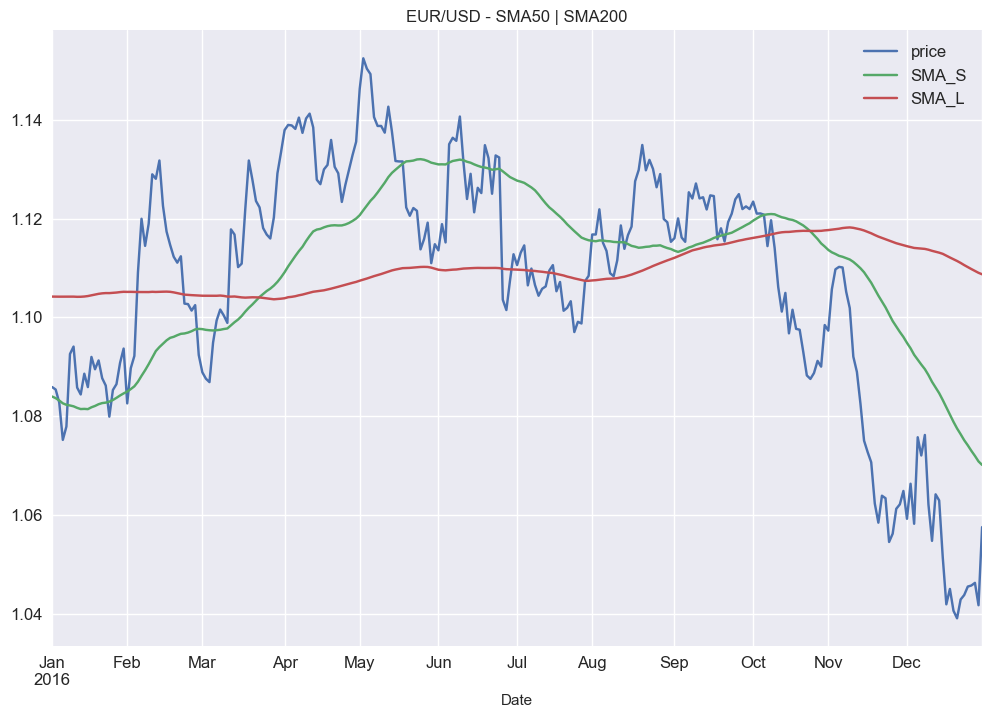

In [144]:
data.loc["2016"].plot(figsize=(12, 8), title="EUR/USD - SMA{} | SMA{}".format(sma_s, sma_l), fontsize=12)
plt.legend(fontsize=12)
plt.show()

In [145]:
data["position"] = np.where(data["SMA_S"] > data["SMA_L"], 1, -1)

In [146]:
data

,price,SMA_S,SMA_L,position
Date,,,,
2004-10-06,1.228094,1.221318,1.226222,-1
2004-10-07,1.229906,1.221840,1.226081,-1
2004-10-08,1.241003,1.222628,1.225995,-1
2004-10-11,1.238405,1.223352,1.225843,-1
2004-10-12,1.232104,1.223888,1.225643,-1
...,...,...,...,...
2020-06-24,1.131235,1.101794,1.103430,-1
2020-06-25,1.125087,1.102486,1.103540,-1
2020-06-26,1.122208,1.103213,1.103627,-1


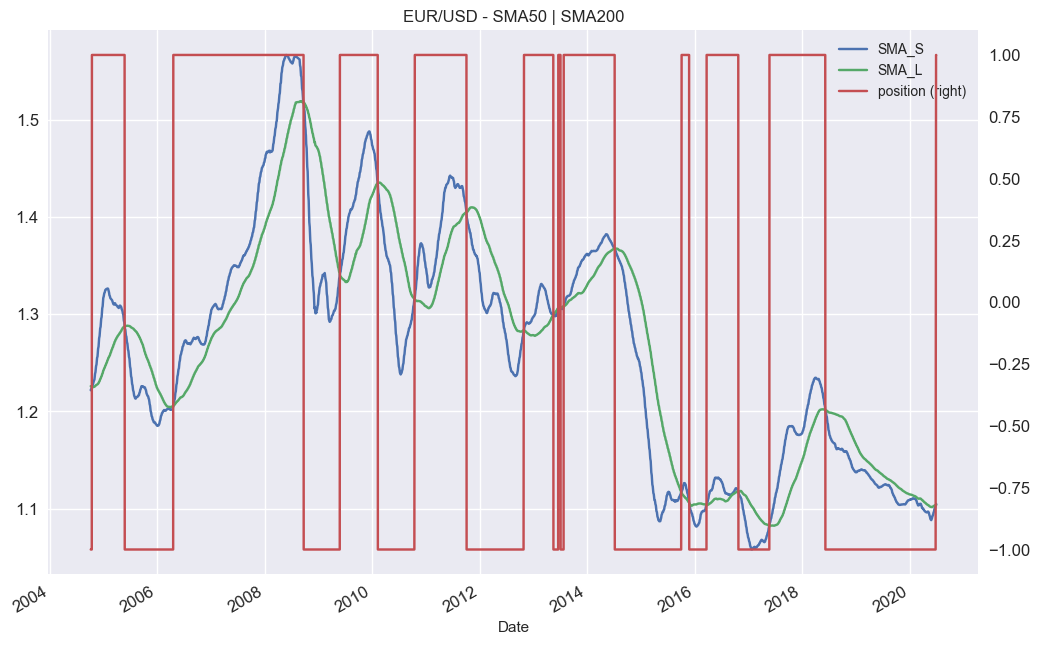

In [163]:
data.loc[:, ["SMA_S", "SMA_L", "position"]].plot(figsize=(12, 8), fontsize=12, secondary_y="position", title="EUR/USD - SMA{} | SMA{}".format(sma_s, sma_l))

plt.show()

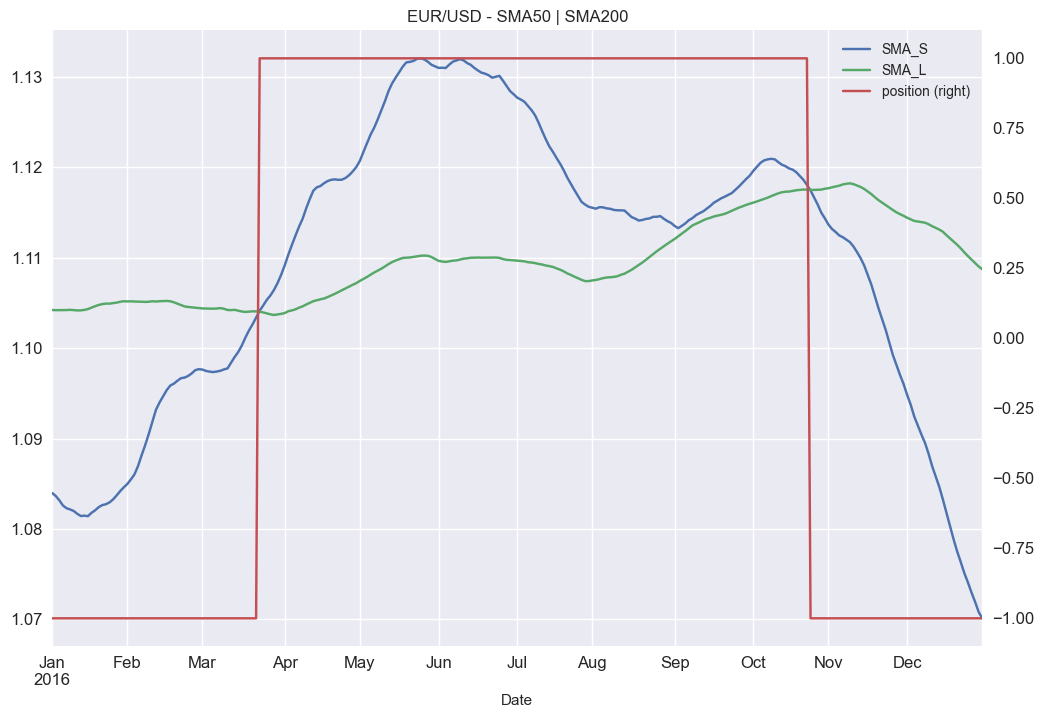

In [165]:
data.loc["2016", ["SMA_S", "SMA_L", "position"]].plot(figsize=(12, 8), fontsize=12, secondary_y="position", title="EUR/USD - SMA{} | SMA{}".format(sma_s, sma_l))
plt.show()

### Vectorized Strategy Backtesting

In [166]:
data

,price,SMA_S,SMA_L,position,returns,strategy,creturns,cstrategy,trades,strategy_net,cstrategy_net
Date,,,,,,,,,,,
2004-10-07,1.229906,1.221840,1.226081,-1,0.001475,-0.001475,1.001475,0.998525,0.0,-0.001475,0.998526
2004-10-08,1.241003,1.222628,1.225995,-1,0.008982,-0.008982,1.010470,0.989557,0.0,-0.008982,0.989598
2004-10-11,1.238405,1.223352,1.225843,-1,-0.002095,0.002095,1.008353,0.991630,0.0,0.002095,0.991673
2004-10-12,1.232104,1.223888,1.225643,-1,-0.005102,0.005102,1.003208,0.996689,0.0,0.005102,0.996746
2004-10-13,1.234903,1.224466,1.225497,-1,0.002270,-0.002270,1.005485,0.994427,0.0,-0.002270,0.994486
...,...,...,...,...,...,...,...,...,...,...,...
2020-06-24,1.131235,1.101794,1.103430,-1,0.002892,-0.002892,0.818656,1.128898,0.0,-0.002892,1.267717
2020-06-25,1.125087,1.102486,1.103540,-1,-0.005449,0.005449,0.814195,1.135049,0.0,0.005449,1.274644
2020-06-26,1.122208,1.103213,1.103627,-1,-0.002562,0.002562,0.812109,1.137957,0.0,0.002562,1.277914
